IMOPRTING  IMPORTANT LIBARARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

IMPORTING CSV AS DATAFRAME

In [4]:
df=pd.read_csv("Sales.csv")

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


CHECKING DATATYPES 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.shape

(200, 4)

 COLUMNS NAMES

In [8]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


CHECKING MISSING VALUES

In [10]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

HANDLING OUTLIERS

<AxesSubplot: >

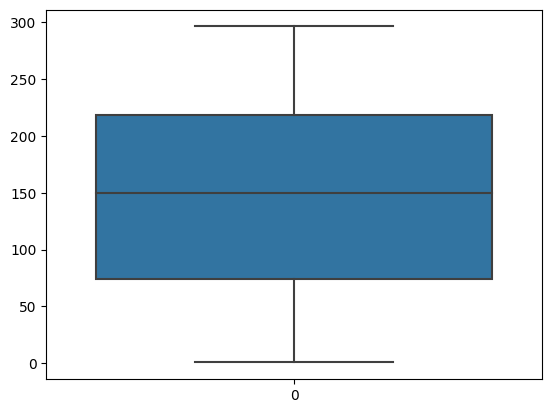

In [11]:
sns.boxplot(df["TV"])

<AxesSubplot: >

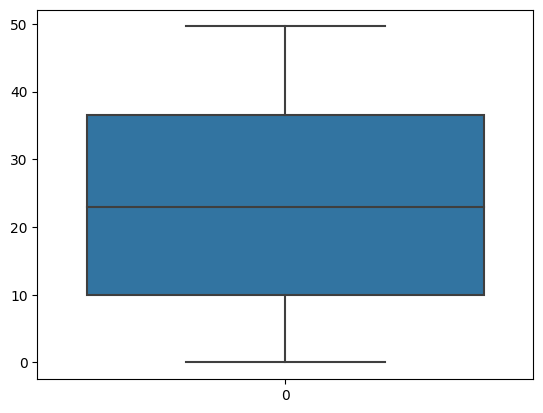

In [12]:
sns.boxplot(df["Radio"])

<AxesSubplot: >

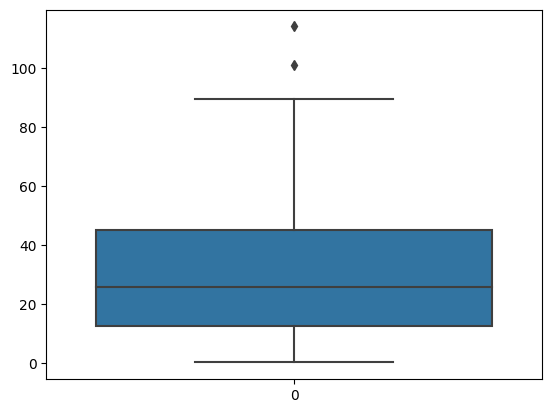

In [13]:
sns.boxplot(df["Newspaper"])

In [14]:
#handling outlier using iqr
q25=df["Newspaper"].quantile(0.25)
q75=df["Newspaper"].quantile(0.75)
iqr=q75-q25
ul=q75+1.5*iqr
ll=q25-1.5*iqr
df['Newspaper']=np.where(df['Newspaper']>ul,ul,np.where(df['Newspaper']<ll,ll,df['Newspaper']))

<AxesSubplot: >

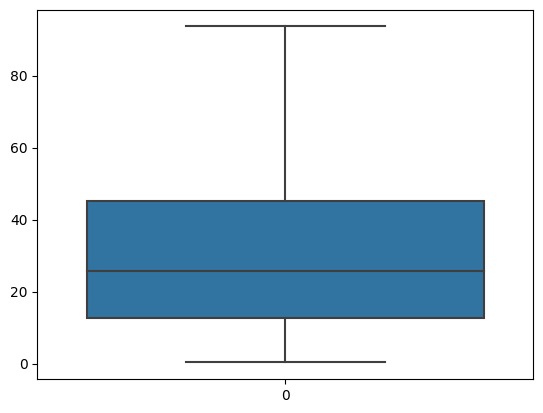

In [15]:
sns.boxplot(df["Newspaper"])

DATA VISUALIZATION

<AxesSubplot: xlabel='Newspaper', ylabel='Density'>

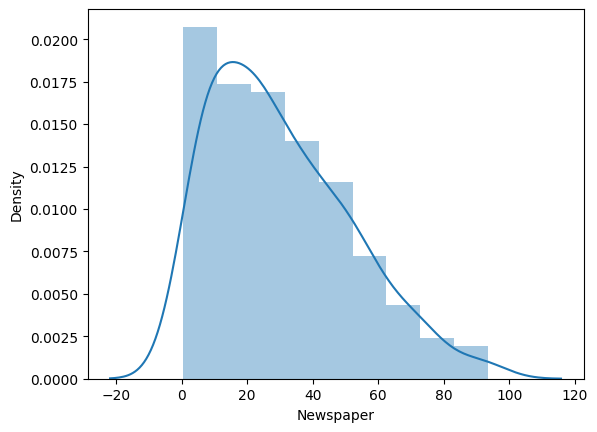

In [29]:
sns.distplot(df['Newspaper'])

<AxesSubplot: xlabel='Radio', ylabel='Density'>

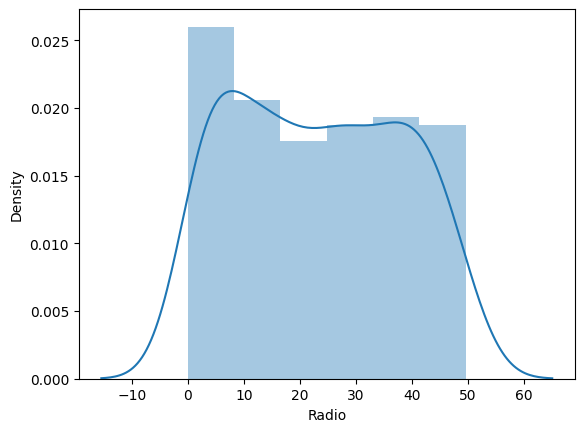

In [30]:
sns.distplot(df['Radio'])

<AxesSubplot: xlabel='TV', ylabel='Density'>

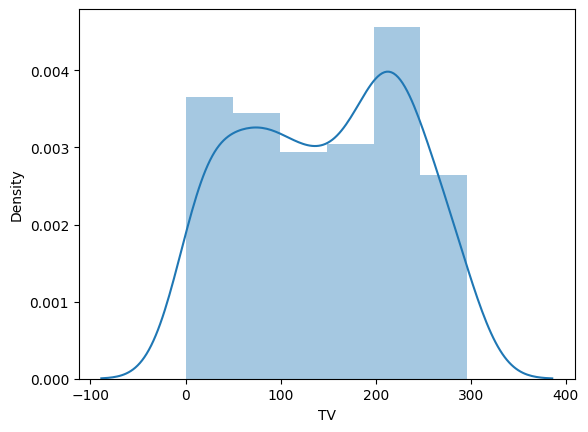

In [32]:
sns.distplot(df['TV'])

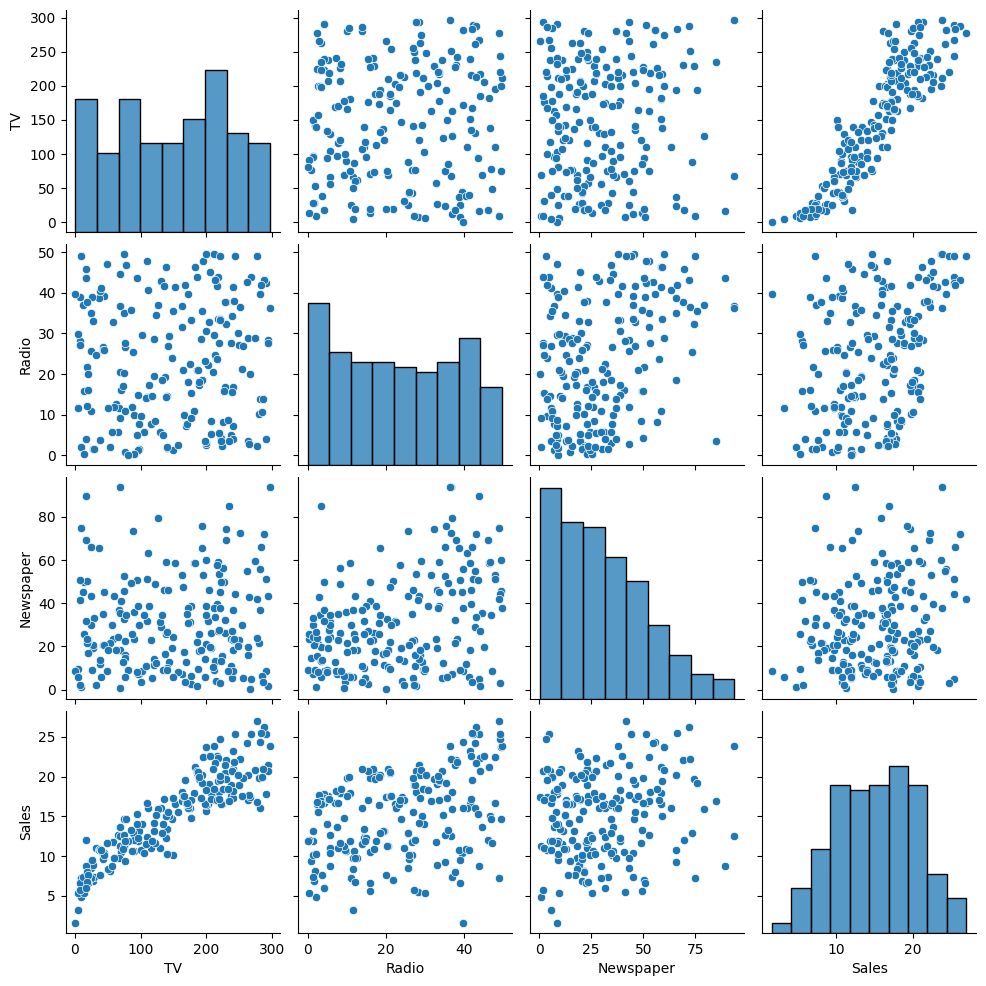

In [16]:
sns.pairplot(df)

<AxesSubplot: >

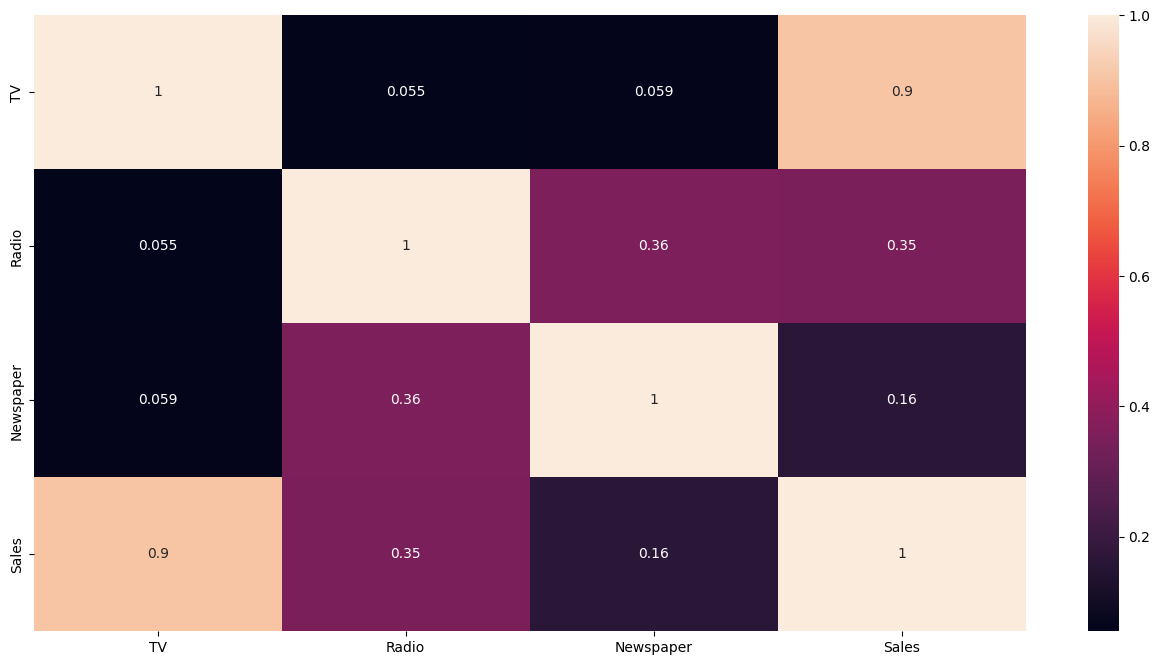

In [17]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)

SEPEARTING FEATURES AND TARGET

In [18]:
x=df.drop(['Sales'],axis=1)

In [19]:
y=df['Sales']

SPLITTING TRAIN AND TEST DATA

In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

MODEL TRAINING AND EVALUATION

In [22]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    train=model.score(xtrain,ytrain)
    test=model.score(xtest,ytest)
    print(f"Training accuracy:{train}\nTesting score:{test}")
    print(f"R2score:{r2_score(ytest,ypred)}")
    return model

In [23]:
lr=mymodel(LinearRegression())

Training accuracy:0.8993705960440478
Testing score:0.9071505589990637
R2score:0.9071505589990637


In [24]:
rfr=mymodel(RandomForestRegressor())

Training accuracy:0.9907552509955102
Testing score:0.9652373794694107
R2score:0.9652373794694107


In [25]:
dtr=mymodel(DecisionTreeRegressor())

Training accuracy:1.0
Testing score:0.9265551923330595
R2score:0.9265551923330595


In [26]:
knn=mymodel(KNeighborsRegressor())

Training accuracy:0.9326230094389056
Testing score:0.9290141926687102
R2score:0.9290141926687102


In [27]:
rid=mymodel(Ridge())

Training accuracy:0.8993705959450266
Testing score:0.9071498284528087
R2score:0.9071498284528087


In [28]:
las=mymodel(Lasso())

Training accuracy:0.8991891680141245
Testing score:0.9059846692924887
R2score:0.9059846692924887
